<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [ ]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


In [ ]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


In [ ]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

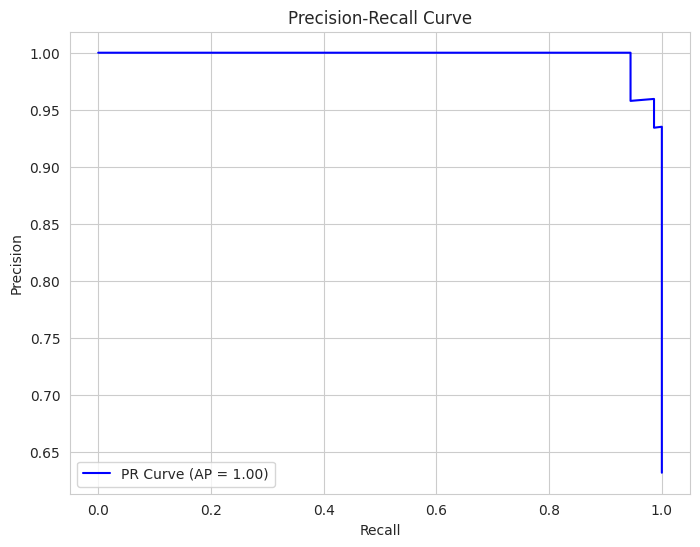

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  
